In [1]:
import pandas as pd 
import numpy as np 
import seaborn as snp 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.isnull().sum().sum()

129425

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
n_val = df.isnull().sum()/df.shape[0]*100
n_val

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
dropc = n_val[n_val>20].keys()
dropc

Index(['company'], dtype='object')

In [11]:
d2_col = df.drop(columns=dropc)
d2_col.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [10]:
d2_col.shape

(119390, 31)

In [12]:
d2_col.isnull().sum().sum()

16832

In [13]:
num_col=d2_col.select_dtypes(include=['int64','float64']).columns 
num_col 

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [14]:
d2_col[num_col].isnull().sum() 

is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
dtype: int64

In [15]:
impute_mean=SimpleImputer(strategy='mean') 

In [16]:
impute_mean.fit(d2_col[num_col]) 

SimpleImputer()

In [17]:
impute_mean.statistics_

array([3.70416283e-01, 1.04011416e+02, 2.01615655e+03, 2.71651730e+01,
       1.57982411e+01, 9.27598626e-01, 2.50030153e+00, 1.85640338e+00,
       1.03889903e-01, 7.94873943e-03, 3.19122205e-02, 8.71178491e-02,
       1.37096909e-01, 2.21124047e-01, 8.66933819e+01, 2.32114917e+00,
       1.01831122e+02, 6.25177988e-02, 5.71362761e-01])

In [18]:
impute_mean.transform(d2_col[num_col])

array([[0.0000e+00, 3.4200e+02, 2.0150e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 7.3700e+02, 2.0150e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 7.0000e+00, 2.0150e+03, ..., 7.5000e+01, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 3.4000e+01, 2.0170e+03, ..., 1.5771e+02, 0.0000e+00,
        4.0000e+00],
       [0.0000e+00, 1.0900e+02, 2.0170e+03, ..., 1.0440e+02, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.0500e+02, 2.0170e+03, ..., 1.5120e+02, 0.0000e+00,
        2.0000e+00]])

In [19]:
d2_col[num_col]=impute_mean.transform(d2_col[num_col])

In [20]:
d2_col[num_col].isnull().sum().sum()

0

In [21]:
cat_col=d2_col.select_dtypes(include="O").columns 
cat_col

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [22]:
d2_col[cat_col].isnull().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [23]:
imputer_mode=SimpleImputer(strategy='most_frequent') 
imputer_mode 

SimpleImputer(strategy='most_frequent')

In [24]:
imputer_mode.fit(d2_col[cat_col])

SimpleImputer(strategy='most_frequent')

In [25]:
imputer_mode.statistics_

array(['City Hotel', 'August', 'BB', 'PRT', 'Online TA', 'TA/TO', 'A',
       'A', 'No Deposit', 'Transient', 'Check-Out', '21-10-15'],
      dtype=object)

In [27]:
d2_col[cat_col]=imputer_mode.transform(d2_col[cat_col])

In [28]:
d2_col[cat_col].isnull().sum().sum()

0

In [29]:
d2_col.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,3.0,No Deposit,86.693382,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,4.0,No Deposit,86.693382,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,No Deposit,86.693382,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,No Deposit,304.000000,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,0.0,No Deposit,240.000000,0.0,Transient,98.0,0.0,1.0,Check-Out,3/7/2015


In [30]:
d2_col.isnull().sum().sum()

0

1 . How Many Booking Were Cancelled? 

In [31]:
cnc = d2_col['is_canceled'].sum()
cnc

44224.0

In [32]:
d2_col.shape

(119390, 31)

In [33]:
cns_val = [d2_col.shape[0] - d2_col['is_canceled'].sum()] 
cns_val

[75166.0]

([<matplotlib.axis.XTick at 0x26cb04ef010>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

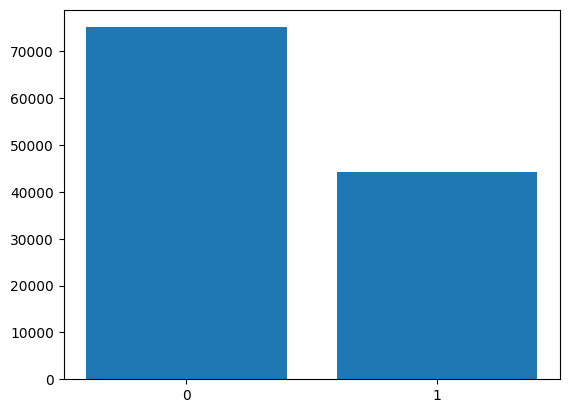

In [34]:
x = cnc
y = cns_val
plt.bar(d2_col['is_canceled'].unique(),d2_col['is_canceled'].value_counts())
plt.xticks([0,1])

2 . What is the booking ratio between Resort Hotel and City Hotel?

In [35]:
ras = d2_col['hotel'].value_counts()
ras

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [36]:
ratio_val = ras/100
ratio_val

hotel
City Hotel      793.3
Resort Hotel    400.6
Name: count, dtype: float64

([<matplotlib.axis.XTick at 0x26cb05220d0>,
 [Text(0, 0, 'Resort Hotel'), Text(1, 0, 'City Hotel')])

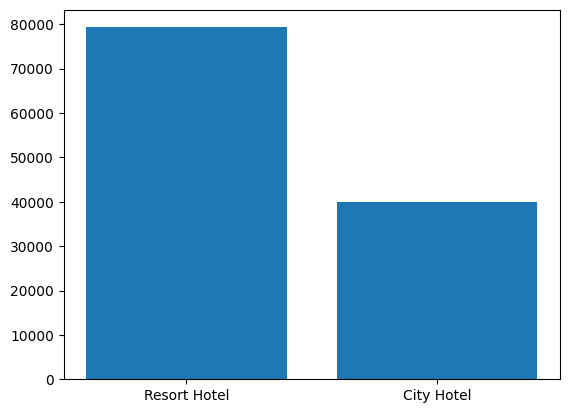

In [37]:
plt.bar(d2_col['hotel'].unique(),d2_col['hotel'].value_counts())
plt.xticks([0,1])

3 . What is the percentage of booking for each year? 

In [38]:
per_book = d2_col['arrival_date_year'].unique()
per_book

array([2015., 2016., 2017.])

In [39]:
per_val = d2_col['arrival_date_year'].value_counts()
per_val

arrival_date_year
2016.0    56707
2017.0    40687
2015.0    21996
Name: count, dtype: int64

In [40]:
per = per_val/100
per

arrival_date_year
2016.0    567.07
2017.0    406.87
2015.0    219.96
Name: count, dtype: float64

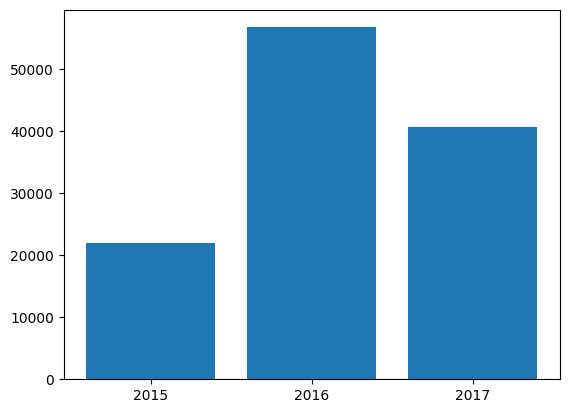

In [50]:
val = d2_col['arrival_date_year'].value_counts()
plt.bar(val.index, val)
plt.xticks(val.index)  
plt.show()

4. Which is the most busy month for hotel? 

In [62]:
mon_b = d2_col['arrival_date_month'].value_counts()
mon_b

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [63]:
max_val = mon_b.idxmax()
max_val

'August'

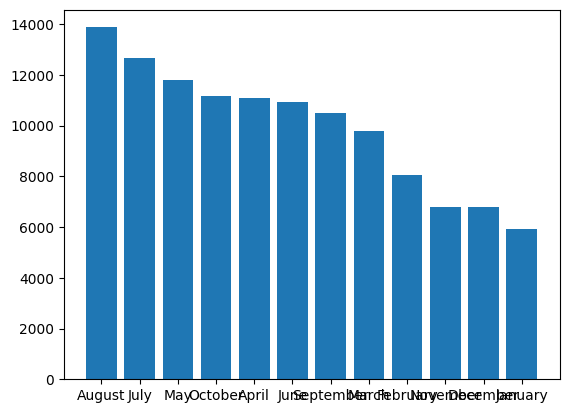

In [64]:
val = d2_col['arrival_date_month'].value_counts()
plt.bar(val.index, val)
plt.xticks(val.index)  
plt.show()

5. From which country most guest come? 

In [67]:
m_guest = d2_col['country'].value_counts()
m_guest

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [70]:
max_guest = m_guest.idxmax()
max_guest

'PRT'

6. How Long People Stay in the hotel? 

In [82]:
ne_df = d2_col[d2_col['is_canceled']==0]
print("t1 = ",ne_df['stays_in_weekend_nights'].value_counts().median())
print("t2 = ",ne_df['stays_in_week_nights'].value_counts().median())

t1 =  5.0
t2 =  15.0


7. Which was the most booked accommodation type (Single, Couple, Family)?

In [79]:
c = d2_col[(d2_col['adults']==2) & (d2_col['children']==0.0) & (d2_col['babies']==0)].shape[0]
s = d2_col[(d2_col['adults']!=2) & (d2_col['children']==0.0) & (d2_col['babies']==0)].shape[0]
f = d2_col[(d2_col['adults']>1) & (d2_col['children']>0.0) & (d2_col['children']>0)].shape[0]
t = c+s+f
t

117985

<Axes: >

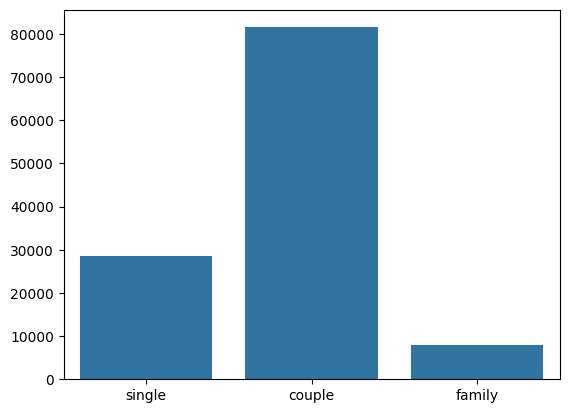

In [81]:
snp.barplot(x=['single','couple','family'],y=[s,c,f])